<font size="12">Exploring the dataset</font>

# Setting up

## Importing libraries

In [9]:
import pandas as pd
import pathlib
import keras
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

## Importing data

In [2]:
url_normal = './Lung/normal/'
url_nodule = './Lung/Nodule/'

In [3]:
images_normal = [cv2.imread(file) for file in glob.glob(url_normal+"*.png")]

In [4]:
images_nodule = [cv2.imread(file) for file in glob.glob(url_nodule+"*.png")]

In [46]:
images_nodule = [cv2.imread(file) for file in glob.glob(url_nodule + "*.png")]
labels_nodule = [1] * len(images_nodule)

images_normal = [cv2.imread(file) for file in glob.glob(url_normal + "*.png")]
labels_normal = [0] * len(images_normal)

## Checking data

In [7]:
normal_count = len(images_normal)
normal_count

320

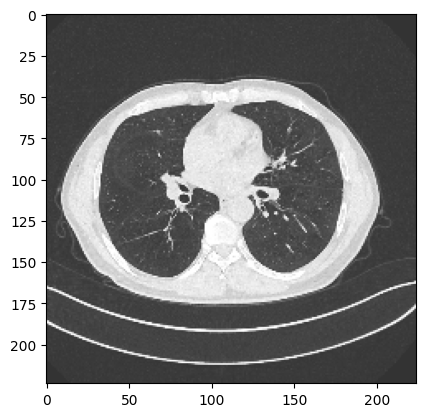

In [45]:
img = np.asarray(images_normal[0])
imgplot = plt.imshow(img)

# Model definition

In [29]:
def initialize_model():

    model = models.Sequential()

    model.add(layers.Conv2D(16, (4,4), activation="relu", input_shape=(224, 224, 3)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(32, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(64, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(64, (2,2), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(32, activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))
    
    ### Model compilation
    model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
       
    
    return model

# Creating X and y for training and testing

In [31]:
X = np.concatenate((images_nodule, images_normal), axis=0)
y = np.concatenate((labels_nodule, labels_normal), axis=0)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [34]:
X_train.shape

(512, 224, 224, 3)

# Training the model

In [35]:
model = initialize_model()

In [37]:
es = EarlyStopping(patience = 20, restore_best_weights=False)

history = model.fit(X_train, y_train, 
          epochs=20,
          batch_size=64,
          validation_split = 0.2,
          callbacks=[es],
          verbose=1)

Epoch 1/20
7/7 [==============================] - 8s 924ms/step - loss: 38.9611 - accuracy: 0.5134 - val_loss: 4.5402 - val_accuracy: 0.5534
Epoch 2/20
7/7 [==============================] - 6s 900ms/step - loss: 1.5118 - accuracy: 0.7017 - val_loss: 0.3297 - val_accuracy: 0.9029
Epoch 3/20
7/7 [==============================] - 6s 899ms/step - loss: 0.3329 - accuracy: 0.8802 - val_loss: 0.3028 - val_accuracy: 0.9223
Epoch 4/20
7/7 [==============================] - 7s 932ms/step - loss: 0.2909 - accuracy: 0.9218 - val_loss: 0.2674 - val_accuracy: 0.8447
Epoch 5/20
7/7 [==============================] - 7s 923ms/step - loss: 0.2377 - accuracy: 0.9071 - val_loss: 0.1775 - val_accuracy: 0.9417
Epoch 6/20
7/7 [==============================] - 7s 927ms/step - loss: 0.1605 - accuracy: 0.9487 - val_loss: 0.2300 - val_accuracy: 0.8932
Epoch 7/20
7/7 [==============================] - 7s 948ms/step - loss: 0.1747 - accuracy: 0.9315 - val_loss: 0.1812 - val_accuracy: 0.9417
Epoch 8/20
7/7 [===

# Testing the model and displaying results

In [52]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

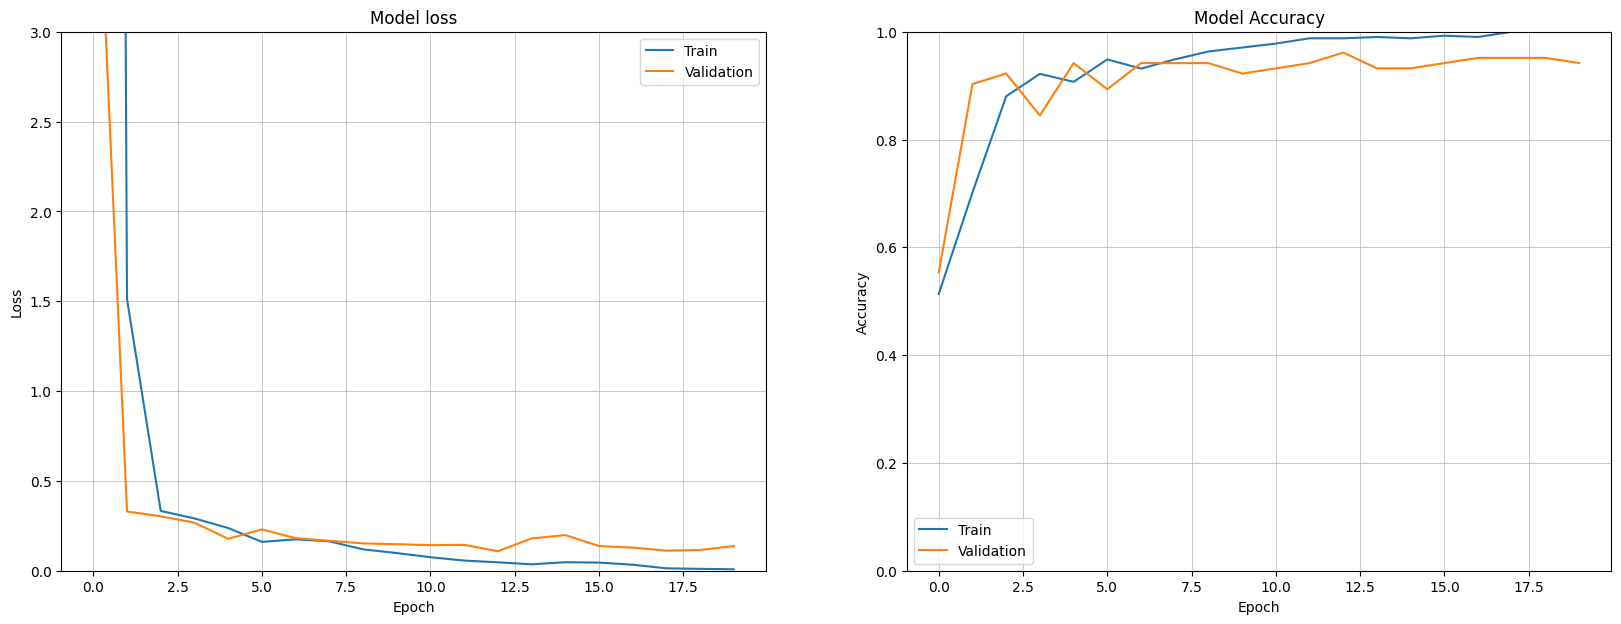

In [53]:
plot_loss_accuracy(history, title=None)

In [47]:
evaluation = model.evaluate(X_test, y_test)

4/4 [==============================] - 1s 133ms/step - loss: 0.1813 - accuracy: 0.9453


In [51]:
print(f'Model accuracy is {round(evaluation[1]*100,2)} %')

Model accuracy is 94.53 %
